# E11 Final Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss 
import statsmodels.formula.api as smf

## HOWARD'S FILES

In [2]:
## Eucalyptus Grove
grove_AQ=pd.read_csv("/Users/howardyan/Desktop/E11 Final Project/Grove/grove_2021-10-29_AQ.csv")
grove_P=pd.read_csv("/Users/howardyan/Desktop/E11 Final Project/Grove/grove_2021-10-29_PTH.csv")
grove_rad=pd.read_csv("/Users/howardyan/Desktop/E11 Final Project/Grove/grove_2021-10-29_D3S.csv")
grove_rad=grove_rad.sum(axis=1)

## Hill near Berkeley National Lab
hill_AQ=pd.read_csv("/Users/howardyan/Desktop/E11 Final Project/Hill/hill_2021-10-29_AQ.csv")
hill_P=pd.read_csv("/Users/howardyan/Desktop/E11 Final Project/Hill/hill_2021-10-29_PTH.csv")
hill_rad=pd.read_csv("/Users/howardyan/Desktop/E11 Final Project/Hill/hill_2021-10-29_D3S.csv")
hill_rad=hill_rad.sum(axis=1)

## Lika Shing
lika_AQ=pd.read_csv("/Users/howardyan/Desktop/E11 Final Project/Lika/lika_2021-10-29_AQ.csv")
lika_P=pd.read_csv("/Users/howardyan/Desktop/E11 Final Project/Lika/lika_2021-10-29_PTH.csv")
lika_rad=pd.read_csv("/Users/howardyan/Desktop/E11 Final Project/Lika/lika_2021-10-29_D3S.csv")
lika_rad=lika_rad.sum(axis=1)

In [3]:
## Eucalyptus Grove
grove_AQ=pd.read_csv("/Users/howardyan/Desktop/E11 Final Project/Grove/grove_2021-10-29_AQ.csv")
grove_P=pd.read_csv("/Users/howardyan/Desktop/E11 Final Project/Grove/grove_2021-10-29_PTH.csv")
grove_rad=pd.read_csv("/Users/howardyan/Desktop/E11 Final Project/Grove/grove_2021-10-29_D3S.csv")
grove_rad=grove_rad.sum(axis=1)

In [4]:
## Hill near Berkeley National Lab
hill_AQ=pd.read_csv("/Users/howardyan/Desktop/E11 Final Project/Hill/hill_2021-10-29_AQ.csv")
hill_P=pd.read_csv("/Users/howardyan/Desktop/E11 Final Project/Hill/hill_2021-10-29_PTH.csv")
hill_rad=pd.read_csv("/Users/howardyan/Desktop/E11 Final Project/Hill/hill_2021-10-29_D3S.csv")
hill_rad=hill_rad.sum(axis=1)

In [5]:
## Lika Shing
lika_AQ=pd.read_csv("/Users/howardyan/Desktop/E11 Final Project/Lika/lika_2021-10-29_AQ.csv")
lika_P=pd.read_csv("/Users/howardyan/Desktop/E11 Final Project/Lika/lika_2021-10-29_PTH.csv")
lika_rad=pd.read_csv("/Users/howardyan/Desktop/E11 Final Project/Lika/lika_2021-10-29_D3S.csv")
lika_rad=lika_rad.sum(axis=1)

## Difference in average radiation counts between locations

In [6]:
## We now remove outliers from the data

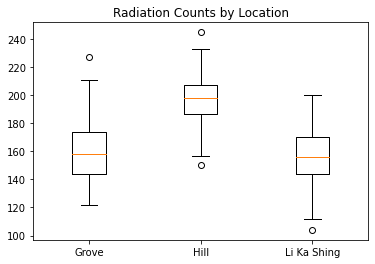

In [7]:
## Before outliers, we compare boxplots side by side
my_dict = {'Grove': grove_rad, 'Hill': hill_rad, 'Li Ka Shing':lika_rad}


fig, ax = plt.subplots()
plt.title('Radiation Counts by Location');
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys());


In [8]:
## Hill radiation after removing outliers
hill_rad_no_outliers=hill_rad[(hill_rad<np.mean(hill_rad)+2*np.std(hill_rad))&(hill_rad>(np.mean(hill_rad)-2*np.std(hill_rad)))]

In [9]:
## Grove radiation after removing outliers
grove_rad_no_outliers=grove_rad[(grove_rad<np.mean(grove_rad)+2*np.std(grove_rad))&(grove_rad>(np.mean(grove_rad)-2*np.std(grove_rad)))]

In [10]:
## Li Ka Shing radiation after removing outliers
lika_rad_no_outliers=lika_rad[(lika_rad<np.mean(lika_rad)+2*np.std(lika_rad))&(lika_rad>(np.mean(lika_rad)-2*np.std(lika_rad)))]

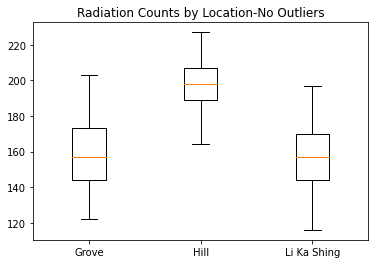

In [11]:
## After removing outliers, we compare boxplots side by side
my_dict = {'Grove': grove_rad_no_outliers, 'Hill': hill_rad_no_outliers, 'Li Ka Shing':lika_rad_no_outliers}

fig, ax = plt.subplots()
plt.title('Radiation Counts by Location-No Outliers');
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys());

## Hill vs Grove

In [12]:
## Comparing Hill and Grove radiation
t_stat, p_val= ss.ttest_ind(hill_rad_no_outliers,grove_rad_no_outliers)
t_stat , p_val

(17.563820653972172, 5.041551716312028e-45)

In [13]:
print("We measured on average, {} counts in the Eucalyptus Grove compared to the Hill over a 5 second interval.".format(grove_rad_no_outliers.mean()-hill_rad_no_outliers.mean()))
print("Since our p-value <0.01, we reject the null hypothesis at the 99% level and conclude there is, on average, less radiaton activiy in the Eucalyptus Grove compared to the Hill")

We measured on average, -38.35134401303284 counts in the Eucalyptus Grove compared to the Hill over a 5 second interval.
Since our p-value <0.01, we reject the null hypothesis at the 99% level and conclude there is, on average, less radiaton activiy in the Eucalyptus Grove compared to the Hill


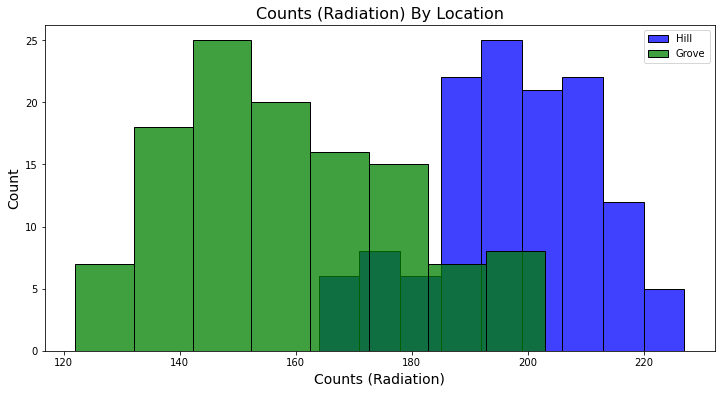

In [14]:
plt.figure(figsize=(12,6))
sns.histplot(hill_rad_no_outliers,label='Hill',color='blue')
sns.histplot(grove_rad_no_outliers,label='Grove',color='green')
plt.legend(loc='upper right');
plt.xlabel('Counts (Radiation)',size=14)
plt.ylabel('Count',size=14)
plt.title('Counts (Radiation) By Location',size=16);

In [15]:
np.mean(hill_rad_no_outliers)**0.5
np.mean(hill_rad_no_outliers)**0.5/5

2.809881326829683

In [16]:
type(hill_rad_no_outliers)

pandas.core.series.Series

In [17]:
dfhill = hill_rad_no_outliers.to_frame()
dfhill

,0
0,181
1,170
2,204
3,183
4,198
...,...
130,209
132,169
133,198
134,168


In [18]:
## uncertainity on STD
hill_unc=np.sqrt(np.mean(dfhill))/np.sqrt(2*(len(dfhill)))
hill_unc

0    0.881538
dtype: float64

In [19]:
##counting stats - dataset varies by this many counts
np.sqrt(np.mean(dfhill))

0    14.049407
dtype: float64

In [20]:
np.std(dfhill)

0    13.744604
dtype: float64

In [21]:
np.mean(dfhill)

0    197.385827
dtype: float64

In [22]:
##STD
std_hill = np.std(hill_rad)
std_hill

16.80029600734035

In [23]:
#grove

In [24]:
dfgrove = grove_rad_no_outliers.to_frame()
dfgrove

,0
0,132
1,137
2,138
3,133
4,123
...,...
113,200
114,172
116,179
117,171


In [25]:
## uncertainity on STD Grove
grove_unc=np.sqrt(np.mean(dfgrove))/np.sqrt(2*(len(dfgrove)))
grove_unc

0    0.827945
dtype: float64

In [26]:
##counting stats - dataset varies by this many counts (grove)
np.sqrt(np.mean(dfgrove))

0    12.610887
dtype: float64

In [27]:
np.std(dfgrove)

0    19.842019
dtype: float64

In [28]:
np.mean(dfgrove)

0    159.034483
dtype: float64

## Hill vs Li Ka Shing

In [29]:
## Comparing Hill and Li Ka Shing radiation
t_stat, p_val= ss.ttest_ind(hill_rad_no_outliers,lika_rad_no_outliers)
t_stat , p_val

(18.16551107334247, 3.6635546813319597e-47)

In [30]:
print("We measured on average, {} counts in the Li Ka Shing area compared to the Hill over a 5 second interval.".format(lika_rad_no_outliers.mean()-hill_rad_no_outliers.mean()))
print("Since our p-value <0.01, we reject the null hypothesis at the 99% level and conclude there is, on average, less radiaton activiy in the Li Ka Shing area compared to the Hill")

We measured on average, -39.36040304283998 counts in the Li Ka Shing area compared to the Hill over a 5 second interval.
Since our p-value <0.01, we reject the null hypothesis at the 99% level and conclude there is, on average, less radiaton activiy in the Li Ka Shing area compared to the Hill


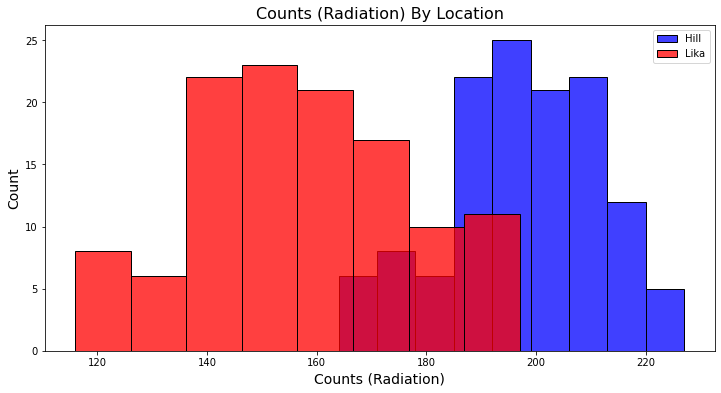

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(hill_rad_no_outliers,label='Hill',color='blue')
sns.histplot(lika_rad_no_outliers,label='Lika',color='red')
plt.legend(loc='upper right');
plt.xlabel('Counts (Radiation)',size=14)
plt.ylabel('Count',size=14)
plt.title('Counts (Radiation) By Location',size=16);

In [32]:
dfli = lika_rad_no_outliers.to_frame()
dfli

,0
0,171
1,142
2,146
3,186
4,159
...,...
116,153
117,171
118,129
119,147


In [33]:
## uncertainity on STD li
grove_unc=np.sqrt(np.mean(dfli))/np.sqrt(2*(len(dfli)))
grove_unc 

0    0.81829
dtype: float64

In [34]:
##counting stats - dataset varies by this many counts (li)
np.sqrt(np.mean(dfli))

0    12.570816
dtype: float64

In [35]:
np.std(dfli)

0    19.699205
dtype: float64

In [36]:
np.mean(dfli)

0    158.025424
dtype: float64

## Eucalyptus Grove vs Li Ka Shing

In [37]:
## Comparing Hill and Li Ka Shing radiation
t_stat, p_val= ss.ttest_ind(grove_rad_no_outliers,lika_rad_no_outliers)
t_stat , p_val

(0.38869161410550146, 0.6978607627224133)

In [38]:
print("Since our p-value >0.05, we fail to reject the null hypothesis at the 95% level. There is no statistically significant difference in radiation levels between the Eucalyptus Grove and Li Ka Shing areas.")

Since our p-value >0.05, we fail to reject the null hypothesis at the 95% level. There is no statistically significant difference in radiation levels between the Eucalyptus Grove and Li Ka Shing areas.


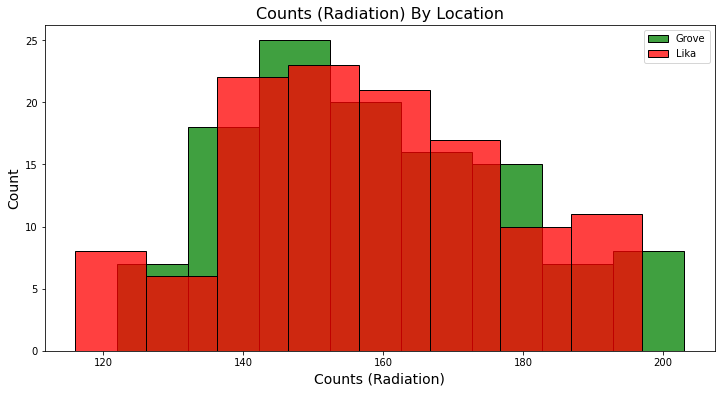

In [39]:
plt.figure(figsize=(12,6))
sns.histplot(grove_rad_no_outliers,label='Grove',color='green')
sns.histplot(lika_rad_no_outliers,label='Lika',color='red')
plt.legend(loc='upper right');
plt.xlabel('Counts (Radiation)',size=14)
plt.ylabel('Count',size=14)
plt.title('Counts (Radiation) By Location',size=16);

## Correlation Analysis

## Information from the Grove

In [40]:
## Humidity and Radiation

In [41]:
grove_P

,Time,Temperature,T Unc.,Humidity,H Unc.,Pressure,P Unc.
0,1.635567e+09,17.226133,0.041765,62.463346,0.234179,0.999220,0.000024
1,1.635567e+09,17.300391,0.031111,62.566592,0.082023,0.999242,0.000022
2,1.635567e+09,17.393945,0.041869,62.086623,0.240370,0.999178,0.000068
3,1.635567e+09,17.490586,0.031787,61.548221,0.135119,0.999197,0.000015
4,1.635567e+09,17.556680,0.023026,61.197376,0.157931,0.999198,0.000010
...,...,...,...,...,...,...,...
69,1.635567e+09,18.134531,0.032341,58.420484,0.139295,0.999066,0.000024
70,1.635567e+09,18.240273,0.029962,58.119218,0.082066,0.999085,0.000026
71,1.635567e+09,18.268789,0.013006,58.152310,0.086751,0.999095,0.000014
72,1.635567e+09,18.237266,0.012924,57.996559,0.188307,0.999079,0.000010


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


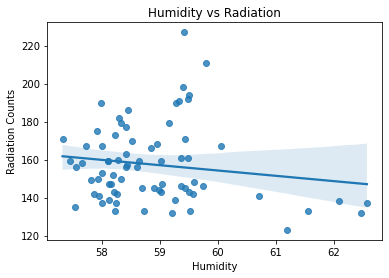

In [42]:
sns.regplot(grove_P['Humidity'],grove_rad[0:len(grove_P)]);
plt.title("Humidity vs Radiation");
plt.xlabel('Humidity')
plt.ylabel('Radiation Counts');

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


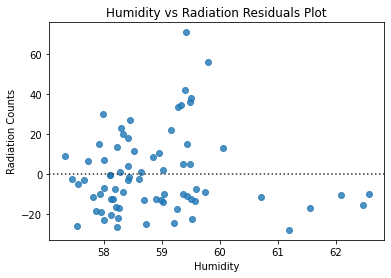

In [43]:
sns.residplot(grove_P['Humidity'],grove_rad[0:len(grove_P)]);
plt.title("Humidity vs Radiation Residuals Plot");
plt.xlabel('Humidity')
plt.ylabel('Radiation Counts');

In [44]:
## I make a new dataframe with the arrays from plt.scatter so I can use the smf.ols package to calculate correlation
humidity_grove=pd.DataFrame()
humidity_grove['Humidity']=grove_P['Humidity']
humidity_grove['Radiation']=grove_rad[0:74]

In [45]:
## I use this package to determine correlation (R-squared)
print(smf.ols('Radiation~Humidity',data=humidity_grove).fit().summary())

                            OLS Regression Results                            
Dep. Variable:              Radiation   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.655
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.202
Time:                        16:34:45   Log-Likelihood:                -327.07
No. Observations:                  74   AIC:                             658.1
Df Residuals:                      72   BIC:                             662.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    322.0886    128.073      2.515      0.0

In [46]:
## Radiation and Air Quality

In [47]:
grove_AQ

,Time,PM 1.0,Unc 1.0,PM 2.5,Unc 2.5,PM 10,Unc. 10
0,1.635567e+09,8.0,0.000000,11.0,0.000000,14.0,0.000000
1,1.635567e+09,8.2,0.400000,11.2,0.400000,14.6,0.489898
2,1.635567e+09,9.0,0.000000,12.0,0.000000,15.0,0.000000
3,1.635567e+09,9.0,0.000000,12.0,0.000000,15.0,0.000000
4,1.635567e+09,8.0,0.000000,11.0,0.000000,15.0,0.000000
...,...,...,...,...,...,...,...
106,1.635567e+09,9.0,0.000000,13.0,0.000000,14.0,0.000000
107,1.635567e+09,9.0,0.000000,13.0,0.000000,14.0,0.000000
108,1.635567e+09,9.0,0.000000,13.0,0.000000,14.0,0.000000
109,1.635567e+09,9.0,0.000000,12.6,0.489898,13.8,0.400000


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


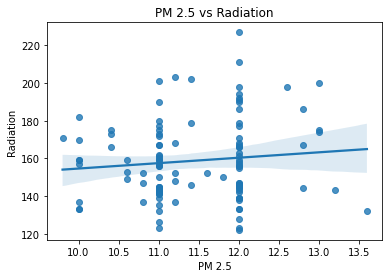

In [48]:
sns.regplot(grove_AQ['PM 2.5'],grove_rad[0:len(grove_AQ)]);
plt.title("PM 2.5 vs Radiation");
plt.xlabel('PM 2.5')
plt.ylabel('Radiation');

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


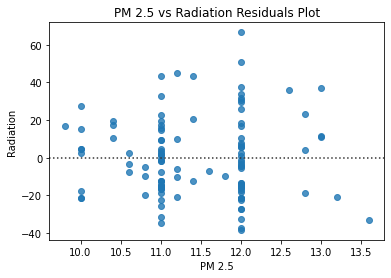

In [49]:
sns.residplot(grove_AQ['PM 2.5'],grove_rad[0:len(grove_AQ)]);
plt.title("PM 2.5 vs Radiation Residuals Plot");
plt.xlabel('PM 2.5')
plt.ylabel('Radiation');

In [50]:
AQ_grove=pd.DataFrame()
AQ_grove['AQ']=grove_AQ['PM 2.5']
AQ_grove['Radiation']=grove_rad[0:len(grove_AQ)]

In [51]:
print(smf.ols('Radiation~AQ',data=AQ_grove).fit().summary())

                            OLS Regression Results                            
Dep. Variable:              Radiation   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.248
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.266
Time:                        16:34:45   Log-Likelihood:                -495.14
No. Observations:                 111   AIC:                             994.3
Df Residuals:                     109   BIC:                             999.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    125.8904     29.512      4.266      0.0

In [52]:
grove_P

,Time,Temperature,T Unc.,Humidity,H Unc.,Pressure,P Unc.
0,1.635567e+09,17.226133,0.041765,62.463346,0.234179,0.999220,0.000024
1,1.635567e+09,17.300391,0.031111,62.566592,0.082023,0.999242,0.000022
2,1.635567e+09,17.393945,0.041869,62.086623,0.240370,0.999178,0.000068
3,1.635567e+09,17.490586,0.031787,61.548221,0.135119,0.999197,0.000015
4,1.635567e+09,17.556680,0.023026,61.197376,0.157931,0.999198,0.000010
...,...,...,...,...,...,...,...
69,1.635567e+09,18.134531,0.032341,58.420484,0.139295,0.999066,0.000024
70,1.635567e+09,18.240273,0.029962,58.119218,0.082066,0.999085,0.000026
71,1.635567e+09,18.268789,0.013006,58.152310,0.086751,0.999095,0.000014
72,1.635567e+09,18.237266,0.012924,57.996559,0.188307,0.999079,0.000010


In [53]:
## Radiation and Temperature

In [54]:
grove_P

,Time,Temperature,T Unc.,Humidity,H Unc.,Pressure,P Unc.
0,1.635567e+09,17.226133,0.041765,62.463346,0.234179,0.999220,0.000024
1,1.635567e+09,17.300391,0.031111,62.566592,0.082023,0.999242,0.000022
2,1.635567e+09,17.393945,0.041869,62.086623,0.240370,0.999178,0.000068
3,1.635567e+09,17.490586,0.031787,61.548221,0.135119,0.999197,0.000015
4,1.635567e+09,17.556680,0.023026,61.197376,0.157931,0.999198,0.000010
...,...,...,...,...,...,...,...
69,1.635567e+09,18.134531,0.032341,58.420484,0.139295,0.999066,0.000024
70,1.635567e+09,18.240273,0.029962,58.119218,0.082066,0.999085,0.000026
71,1.635567e+09,18.268789,0.013006,58.152310,0.086751,0.999095,0.000014
72,1.635567e+09,18.237266,0.012924,57.996559,0.188307,0.999079,0.000010


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


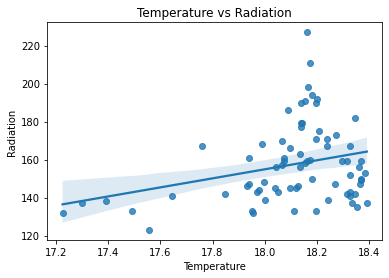

In [55]:
sns.regplot(grove_P['Temperature'],grove_rad[0:len(grove_P)]);
plt.title("Temperature vs Radiation");
plt.xlabel('Temperature')
plt.ylabel('Radiation');

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


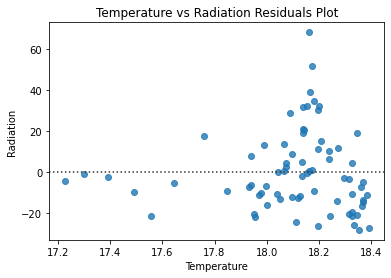

In [56]:
sns.residplot(grove_P['Temperature'],grove_rad[0:len(grove_P)]);
plt.title("Temperature vs Radiation Residuals Plot");
plt.xlabel('Temperature')
plt.ylabel('Radiation');

In [57]:
Temp_grove=pd.DataFrame()
Temp_grove['Temp']=grove_P['Temperature']
Temp_grove['Radiation']=grove_rad[0:len(grove_P)]

In [58]:
print(smf.ols('Radiation~Temp',data=Temp_grove).fit().summary())

                            OLS Regression Results                            
Dep. Variable:              Radiation   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     6.496
Date:                Wed, 15 Dec 2021   Prob (F-statistic):             0.0129
Time:                        16:34:46   Log-Likelihood:                -324.72
No. Observations:                  74   AIC:                             653.4
Df Residuals:                      72   BIC:                             658.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -273.9217    169.233     -1.619      0.1

In [59]:
all_grove=pd.DataFrame()
all_grove['Temp']=grove_P['Temperature']
all_grove['Humidity']=grove_P['Humidity']
all_grove['AQ']=grove_AQ['PM 2.5'][0:74]
all_grove['Rad']=grove_rad[0:74]
print(smf.ols('Rad~Temp+AQ+Humidity+Temp',data=all_grove).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                    Rad   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     5.331
Date:                Wed, 15 Dec 2021   Prob (F-statistic):            0.00229
Time:                        16:34:46   Log-Likelihood:                -320.30
No. Observations:                  74   AIC:                             648.6
Df Residuals:                      70   BIC:                             657.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1897.2923    661.028     -2.870      0.0

## Information from the Hill

In [60]:
## Humidity and Radiation

In [61]:
hill_P

,Time,Temperature,T Unc.,Humidity,H Unc.,Pressure,P Unc.
0,1.635565e+09,19.383672,0.017473,55.679554,0.664360,0.988981,0.000021
1,1.635565e+09,19.448789,0.021972,56.215866,0.144584,0.988965,0.000013
2,1.635565e+09,19.490508,0.012272,56.269130,0.272613,0.988940,0.000014
3,1.635565e+09,19.468125,0.038863,55.576979,0.714143,0.988862,0.000023
4,1.635565e+09,19.444727,0.021768,54.225954,0.232121,0.988818,0.000024
...,...,...,...,...,...,...,...
69,1.635566e+09,19.802773,0.013477,58.196000,1.043999,0.987480,0.000050
70,1.635566e+09,19.866875,0.021924,59.260608,0.209106,0.987574,0.000014
71,1.635566e+09,19.937070,0.023767,58.884413,0.113010,0.987612,0.000016
72,1.635566e+09,19.996055,0.015200,59.062041,0.594477,0.987664,0.000023


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


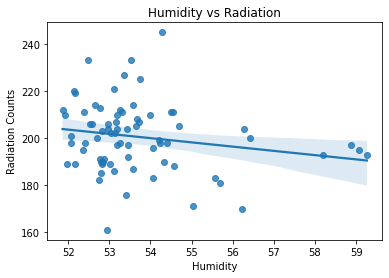

In [62]:
sns.regplot(hill_P['Humidity'],hill_rad[0:len(hill_P)]);
plt.title("Humidity vs Radiation");
plt.xlabel('Humidity')
plt.ylabel('Radiation Counts');

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


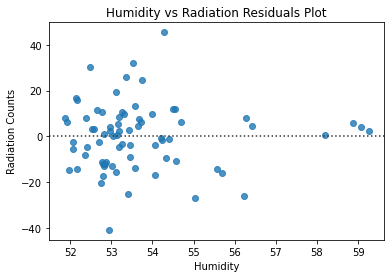

In [63]:
sns.residplot(hill_P['Humidity'],hill_rad[0:len(hill_P)]);
plt.title("Humidity vs Radiation Residuals Plot");
plt.xlabel('Humidity')
plt.ylabel('Radiation Counts');

In [64]:
## I make a new dataframe with the arrays from plt.scatter so I can use the smf.ols package to calculate correlation
humidity_hill=pd.DataFrame()
humidity_hill['Humidity']=hill_P['Humidity']
humidity_hill['Radiation']=hill_rad[0:74]

In [65]:
## I use this package to determine correlation (R-squared)
print(smf.ols('Radiation~Humidity',data=humidity_hill).fit().summary())

                            OLS Regression Results                            
Dep. Variable:              Radiation   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     2.899
Date:                Wed, 15 Dec 2021   Prob (F-statistic):             0.0930
Time:                        16:34:46   Log-Likelihood:                -302.06
No. Observations:                  74   AIC:                             608.1
Df Residuals:                      72   BIC:                             612.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    297.6233     57.038      5.218      0.0

In [66]:
## Radiation and Air Quality

In [67]:
hill_AQ

,Time,PM 1.0,Unc 1.0,PM 2.5,Unc 2.5,PM 10,Unc. 10
0,1.635565e+09,9.0,0.0,13.0,0.0,16.0,0.000000
1,1.635565e+09,9.0,0.0,13.0,0.0,16.2,0.400000
2,1.635565e+09,9.0,0.0,13.0,0.0,16.0,0.000000
3,1.635565e+09,9.0,0.0,13.0,0.0,16.6,0.489898
4,1.635565e+09,9.0,0.0,13.0,0.0,16.0,0.632456
...,...,...,...,...,...,...,...
109,1.635566e+09,9.0,0.0,13.0,0.0,16.0,0.000000
110,1.635566e+09,9.0,0.0,12.0,0.0,16.0,0.000000
111,1.635566e+09,9.0,0.0,12.0,0.0,15.4,0.489898
112,1.635566e+09,9.0,0.0,12.0,0.0,16.0,0.000000


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


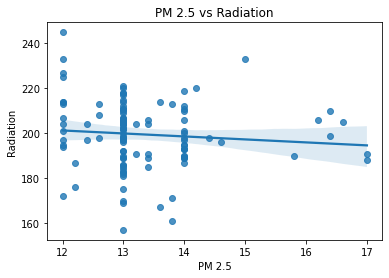

In [68]:
sns.regplot(hill_AQ['PM 2.5'],hill_rad[0:len(hill_AQ)]);
plt.title("PM 2.5 vs Radiation");
plt.xlabel('PM 2.5')
plt.ylabel('Radiation');

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


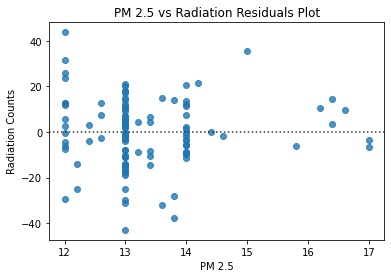

In [69]:
sns.residplot(hill_AQ['PM 2.5'],hill_rad[0:len(hill_AQ)]);
plt.title("PM 2.5 vs Radiation Residuals Plot");
plt.xlabel('PM 2.5')
plt.ylabel('Radiation Counts');

In [70]:
AQ_hill=pd.DataFrame()
AQ_hill['AQ']=hill_AQ['PM 2.5']
AQ_hill['Radiation']=hill_rad[0:len(hill_AQ)]

In [71]:
print(smf.ols('Radiation~AQ',data=AQ_hill).fit().summary())

                            OLS Regression Results                            
Dep. Variable:              Radiation   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9750
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.326
Time:                        16:34:46   Log-Likelihood:                -468.67
No. Observations:                 114   AIC:                             941.3
Df Residuals:                     112   BIC:                             946.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    217.2064     17.977     12.082      0.0

In [72]:
## Radiation and Temperature

In [73]:
hill_P

,Time,Temperature,T Unc.,Humidity,H Unc.,Pressure,P Unc.
0,1.635565e+09,19.383672,0.017473,55.679554,0.664360,0.988981,0.000021
1,1.635565e+09,19.448789,0.021972,56.215866,0.144584,0.988965,0.000013
2,1.635565e+09,19.490508,0.012272,56.269130,0.272613,0.988940,0.000014
3,1.635565e+09,19.468125,0.038863,55.576979,0.714143,0.988862,0.000023
4,1.635565e+09,19.444727,0.021768,54.225954,0.232121,0.988818,0.000024
...,...,...,...,...,...,...,...
69,1.635566e+09,19.802773,0.013477,58.196000,1.043999,0.987480,0.000050
70,1.635566e+09,19.866875,0.021924,59.260608,0.209106,0.987574,0.000014
71,1.635566e+09,19.937070,0.023767,58.884413,0.113010,0.987612,0.000016
72,1.635566e+09,19.996055,0.015200,59.062041,0.594477,0.987664,0.000023


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


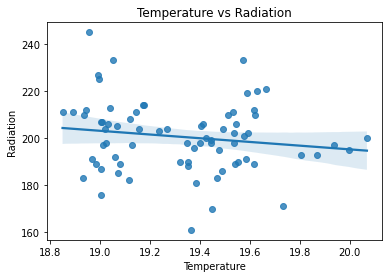

In [74]:
sns.regplot(hill_P['Temperature'],hill_rad[0:len(hill_P)]);
plt.title("Temperature vs Radiation");
plt.xlabel('Temperature')
plt.ylabel('Radiation');

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


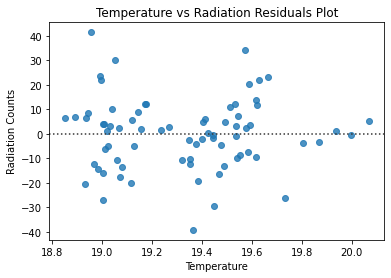

In [75]:
sns.residplot(hill_P['Temperature'],hill_rad[0:len(hill_P)]);
plt.title("Temperature vs Radiation Residuals Plot");
plt.xlabel('Temperature')
plt.ylabel('Radiation Counts');

In [76]:
Temp_hill=pd.DataFrame()
Temp_hill['Temp']=hill_P['Temperature']
Temp_hill['Radiation']=hill_rad[0:len(hill_P)]

In [77]:
print(smf.ols('Radiation~Temp',data=Temp_hill).fit().summary())

                            OLS Regression Results                            
Dep. Variable:              Radiation   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.819
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.182
Time:                        16:34:47   Log-Likelihood:                -302.60
No. Observations:                  74   AIC:                             609.2
Df Residuals:                      72   BIC:                             613.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    352.9880    113.036      3.123      0.0

In [78]:
all_Hill=pd.DataFrame()
all_Hill['Temp']=hill_P['Temperature']
all_Hill['Humidity']=hill_P['Humidity']
all_Hill['AQ']=hill_AQ['PM 2.5'][0:74]
all_Hill['Rad']=hill_rad[0:74]
print(smf.ols('Rad~Temp+AQ+Humidity+Temp',data=all_Hill).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                    Rad   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     1.401
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.250
Time:                        16:34:47   Log-Likelihood:                -301.37
No. Observations:                  74   AIC:                             610.7
Df Residuals:                      70   BIC:                             619.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    342.9561    121.882      2.814      0.0

## Information from Li Ka Shing

In [79]:
## Humidity and Radiation

In [80]:
lika_P

,Time,Temperature,T Unc.,Humidity,H Unc.,Pressure,P Unc.
0,1.635566e+09,17.442734,0.017708,61.384606,0.167918,0.997139,0.000011
1,1.635566e+09,17.477344,0.011026,62.192665,0.365659,0.997115,0.000014
2,1.635566e+09,17.489609,0.007943,62.726298,0.258730,0.997121,0.000016
3,1.635566e+09,17.474297,0.018245,61.446045,0.406065,0.997092,0.000019
4,1.635566e+09,17.489570,0.013332,60.734414,0.125753,0.997089,0.000016
...,...,...,...,...,...,...,...
69,1.635567e+09,17.793711,0.027888,59.000688,0.054848,0.998446,0.000040
70,1.635567e+09,17.825234,0.024926,59.147380,0.119103,0.998418,0.000034
71,1.635567e+09,17.858828,0.032624,59.291388,0.220559,0.998375,0.000016
72,1.635567e+09,17.941172,0.023905,58.560460,0.111295,0.998351,0.000020


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


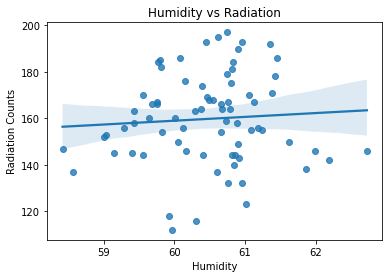

In [81]:
sns.regplot(lika_P['Humidity'],lika_rad[0:len(lika_P)]);
plt.title("Humidity vs Radiation");
plt.xlabel('Humidity')
plt.ylabel('Radiation Counts');

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


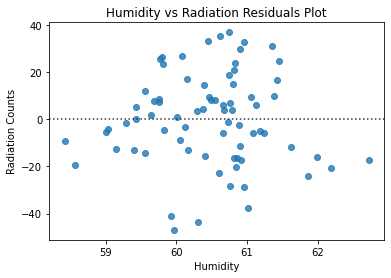

In [82]:
sns.residplot(lika_P['Humidity'],lika_rad[0:len(lika_P)]);
plt.title("Humidity vs Radiation Residuals Plot");
plt.xlabel('Humidity')
plt.ylabel('Radiation Counts');

In [83]:
## I make a new dataframe with the arrays from plt.scatter so I can use the smf.ols package to calculate correlation
humidity_lika=pd.DataFrame()
humidity_lika['Humidity']=lika_P['Humidity']
humidity_lika['Radiation']=lika_rad[0:74]

In [84]:
## I use this package to determine correlation (R-squared)
print(smf.ols('Radiation~Humidity',data=humidity_lika).fit().summary())

                            OLS Regression Results                            
Dep. Variable:              Radiation   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.3436
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.560
Time:                        16:34:47   Log-Likelihood:                -323.51
No. Observations:                  74   AIC:                             651.0
Df Residuals:                      72   BIC:                             655.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     60.5087    169.270      0.357      0.7

In [85]:
## Radiation and Air Quality

In [86]:
lika_AQ

,Time,PM 1.0,Unc 1.0,PM 2.5,Unc 2.5,PM 10,Unc. 10
0,1.635566e+09,9.0,0.000000,12.0,0.000000,15.0,0.000000
1,1.635566e+09,9.0,0.000000,13.0,0.000000,15.0,0.000000
2,1.635566e+09,9.0,0.000000,12.4,0.489898,14.2,0.400000
3,1.635566e+09,8.4,0.489898,11.4,0.489898,12.6,0.489898
4,1.635566e+09,8.6,0.800000,11.4,0.489898,12.0,0.632456
...,...,...,...,...,...,...,...
105,1.635567e+09,8.2,0.400000,11.2,0.400000,15.0,0.000000
106,1.635567e+09,8.0,0.000000,11.0,0.000000,14.0,0.000000
107,1.635567e+09,8.0,0.000000,11.0,0.000000,14.0,0.000000
108,1.635567e+09,8.0,0.000000,11.0,0.000000,14.0,0.000000


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


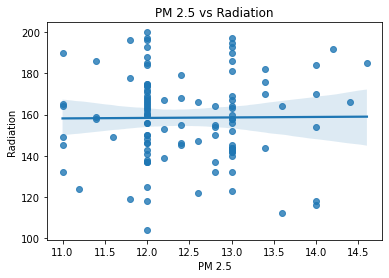

In [87]:
x=lika_AQ['PM 2.5']
y=lika_rad[0:len(lika_AQ)]
sns.regplot(x,y);
plt.title("PM 2.5 vs Radiation");
plt.xlabel('PM 2.5')
plt.ylabel('Radiation');

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


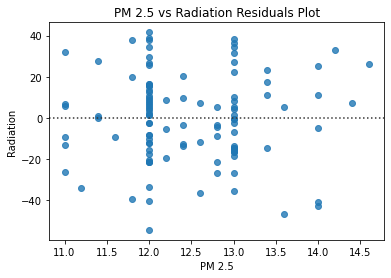

In [88]:
sns.residplot(lika_AQ['PM 2.5'],lika_rad[0:len(lika_AQ)]);
plt.title("PM 2.5 vs Radiation Residuals Plot");
plt.xlabel('PM 2.5')
plt.ylabel('Radiation');

In [89]:
AQ_lika=pd.DataFrame()
AQ_lika['AQ']=lika_AQ['PM 2.5']
AQ_lika['Radiation']=lika_rad[0:len(lika_AQ)]

In [90]:
print(smf.ols('Radiation~AQ',data=AQ_lika).fit().summary())

                            OLS Regression Results                            
Dep. Variable:              Radiation   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                  0.007868
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.929
Time:                        16:34:48   Log-Likelihood:                -492.70
No. Observations:                 110   AIC:                             989.4
Df Residuals:                     108   BIC:                             994.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    155.5686     33.110      4.699      0.0

In [91]:
## Radiation and Temperature

In [92]:
lika_P

,Time,Temperature,T Unc.,Humidity,H Unc.,Pressure,P Unc.
0,1.635566e+09,17.442734,0.017708,61.384606,0.167918,0.997139,0.000011
1,1.635566e+09,17.477344,0.011026,62.192665,0.365659,0.997115,0.000014
2,1.635566e+09,17.489609,0.007943,62.726298,0.258730,0.997121,0.000016
3,1.635566e+09,17.474297,0.018245,61.446045,0.406065,0.997092,0.000019
4,1.635566e+09,17.489570,0.013332,60.734414,0.125753,0.997089,0.000016
...,...,...,...,...,...,...,...
69,1.635567e+09,17.793711,0.027888,59.000688,0.054848,0.998446,0.000040
70,1.635567e+09,17.825234,0.024926,59.147380,0.119103,0.998418,0.000034
71,1.635567e+09,17.858828,0.032624,59.291388,0.220559,0.998375,0.000016
72,1.635567e+09,17.941172,0.023905,58.560460,0.111295,0.998351,0.000020


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


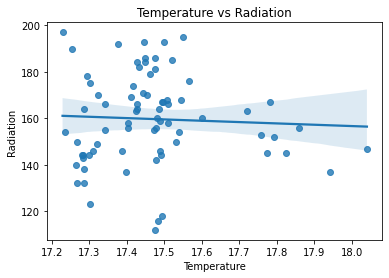

In [93]:
sns.regplot(lika_P['Temperature'],lika_rad[0:len(lika_P)]);
plt.title("Temperature vs Radiation");
plt.xlabel('Temperature')
plt.ylabel('Radiation');

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


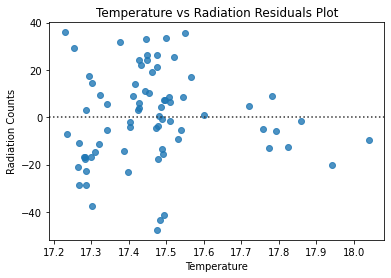

In [94]:
sns.residplot(lika_P['Temperature'],lika_rad[0:len(lika_P)]);
plt.title("Temperature vs Radiation Residuals Plot");
plt.xlabel('Temperature')
plt.ylabel('Radiation Counts');

In [95]:
Temp_lika=pd.DataFrame()
Temp_lika['Temp']=lika_P['Temperature']
Temp_lika['Radiation']=lika_rad[0:len(lika_P)]

In [96]:
print(smf.ols('Radiation~Temp',data=Temp_lika).fit().summary())

                            OLS Regression Results                            
Dep. Variable:              Radiation   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.1791
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.673
Time:                        16:34:48   Log-Likelihood:                -323.60
No. Observations:                  74   AIC:                             651.2
Df Residuals:                      72   BIC:                             655.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    259.2818    235.283      1.102      0.2

In [97]:
all_lika=pd.DataFrame()
all_lika['Temp']=lika_P['Temperature']
all_lika['Humidity']=lika_P['Humidity']
all_lika['AQ']=lika_AQ['PM 2.5'][0:74]
all_lika['Rad']=lika_rad[0:74]
print(smf.ols('Rad~Temp+AQ+Humidity+Temp',data=all_lika).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                    Rad   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.038
Method:                 Least Squares   F-statistic:                    0.1166
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.950
Time:                        16:34:48   Log-Likelihood:                -323.50
No. Observations:                  74   AIC:                             655.0
Df Residuals:                      70   BIC:                             664.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     99.9971    591.026      0.169      0.8

In [98]:
## Difference Between Grove and Hill

In [99]:
all_Hill['Dummy']=[1] * len(all_Hill)

In [100]:
all_lika['Dummy']=[0] * len(all_lika)

In [101]:
lika_and_hill=pd.concat([all_Hill,all_lika],ignore_index=True)
lika_and_hill
## Hill if Dummy=1

,Temp,Humidity,AQ,Rad,Dummy
0,19.383672,55.679554,13.0,181,1
1,19.448789,56.215866,13.0,170,1
2,19.490508,56.269130,13.0,204,1
3,19.468125,55.576979,13.0,183,1
4,19.444727,54.225954,13.0,198,1
...,...,...,...,...,...
143,17.793711,59.000688,13.0,152,0
144,17.825234,59.147380,12.4,145,0
145,17.858828,59.291388,12.0,156,0
146,17.941172,58.560460,12.0,137,0


In [102]:
print(smf.ols('Rad~Humidity+Temp+AQ',data=lika_and_hill).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                    Rad   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     63.87
Date:                Wed, 15 Dec 2021   Prob (F-statistic):           2.54e-26
Time:                        16:34:48   Log-Likelihood:                -633.04
No. Observations:                 148   AIC:                             1274.
Df Residuals:                     144   BIC:                             1286.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    184.4028    112.664      1.637      0.1

In [103]:
print(smf.ols('Rad~Humidity+Temp+AQ+Dummy',data=lika_and_hill).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                    Rad   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     52.77
Date:                Wed, 15 Dec 2021   Prob (F-statistic):           3.06e-27
Time:                        16:34:48   Log-Likelihood:                -628.56
No. Observations:                 148   AIC:                             1267.
Df Residuals:                     143   BIC:                             1282.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    325.6017    119.445      2.726      0.0

In [104]:
## Clustering

In [105]:
all_grove['Dummy']=2

In [106]:
all_grove['Name']='Grove'

In [107]:
all_lika['Name']='Li Ka Shing'

In [108]:
all_Hill['Name']='Hill'

In [109]:
all_datasets=pd.concat([all_Hill,all_lika,all_grove],ignore_index=True)
all_datasets

,Temp,Humidity,AQ,Rad,Dummy,Name
0,19.383672,55.679554,13.0,181,1,Hill
1,19.448789,56.215866,13.0,170,1,Hill
2,19.490508,56.269130,13.0,204,1,Hill
3,19.468125,55.576979,13.0,183,1,Hill
4,19.444727,54.225954,13.0,198,1,Hill
...,...,...,...,...,...,...
217,18.134531,58.420484,12.0,163,2,Grove
218,18.240273,58.119218,12.0,139,2,Grove
219,18.268789,58.152310,12.0,147,2,Grove
220,18.237266,57.996559,12.0,167,2,Grove


In [150]:
print(smf.ols('Rad~Humidity+Temp+AQ+Dummy',data=all_datasets).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                    Rad   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     60.28
Date:                Wed, 15 Dec 2021   Prob (F-statistic):           3.59e-34
Time:                        17:00:25   Log-Likelihood:                -963.15
No. Observations:                 222   AIC:                             1936.
Df Residuals:                     217   BIC:                             1953.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    105.5839    118.925      0.888      0.3

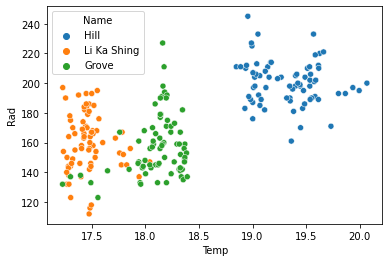

In [110]:
sns.scatterplot(x='Temp',y='Rad',hue='Name',data=all_datasets);

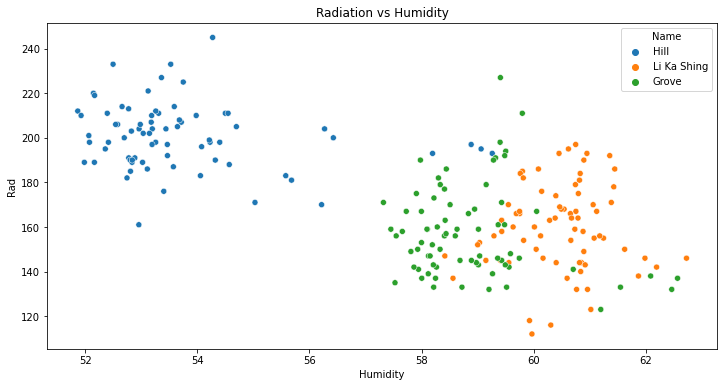

In [135]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Humidity',y='Rad',hue='Name',data=all_datasets);
plt.title('Radiation vs Humidity');

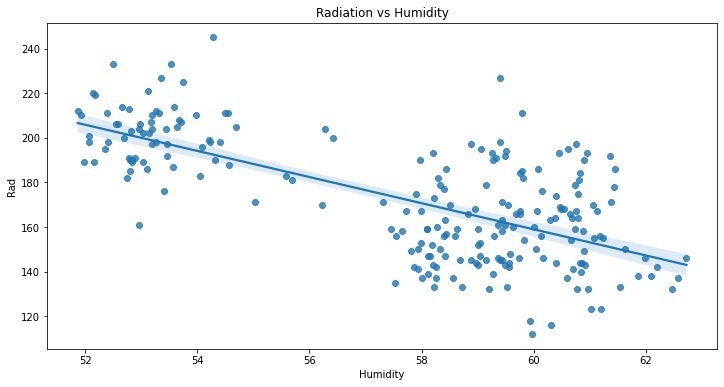

In [138]:
plt.figure(figsize=(12,6))
sns.regplot(x='Humidity',y='Rad',data=all_datasets);
plt.title('Radiation vs Humidity');

In [141]:
print(smf.ols('Rad~Humidity+Name',data=all_datasets).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                    Rad   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     87.72
Date:                Wed, 15 Dec 2021   Prob (F-statistic):           2.91e-37
Time:                        16:46:14   Log-Likelihood:                -958.21
No. Observations:                 222   AIC:                             1924.
Df Residuals:                     218   BIC:                             1938.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             249.4158    

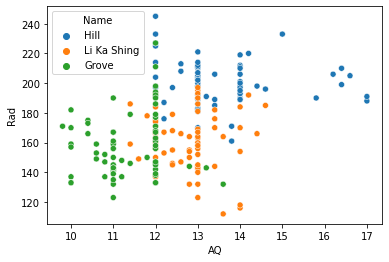

In [112]:
sns.scatterplot(x='AQ',y='Rad',hue='Name',data=all_datasets);

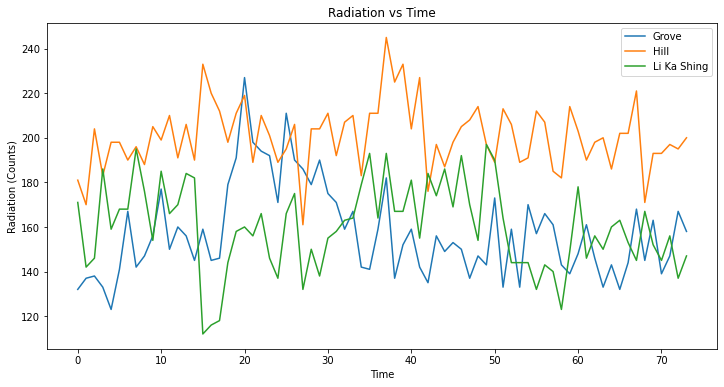

In [149]:
plt.figure(figsize=(12,6))
plt.plot(all_grove['Rad'],label='Grove');
plt.plot(all_Hill['Rad'],label='Hill');
plt.plot(all_lika['Rad'],label='Li Ka Shing');
plt.legend(loc='upper right');
plt.xlabel('Time')
plt.ylabel('Radiation (Counts)')
plt.title('Radiation vs Time');

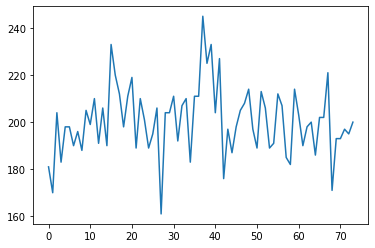

In [127]:
plt.plot(all_Hill['Rad']);

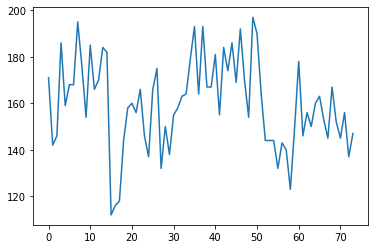

In [128]:
plt.plot(all_lika['Rad']);